# Course: https://www.coursera.org/learn/statistics-for-data-science-python/home/week/9

# Task 3: Load in the Dataset in your Jupyter Notebook

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# Task 4: Generate Descriptive Statistics and Visualizations


For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


##  Visualization 4.1: Boxplot for the "Median value of owner-occupied homes" (MEDV)

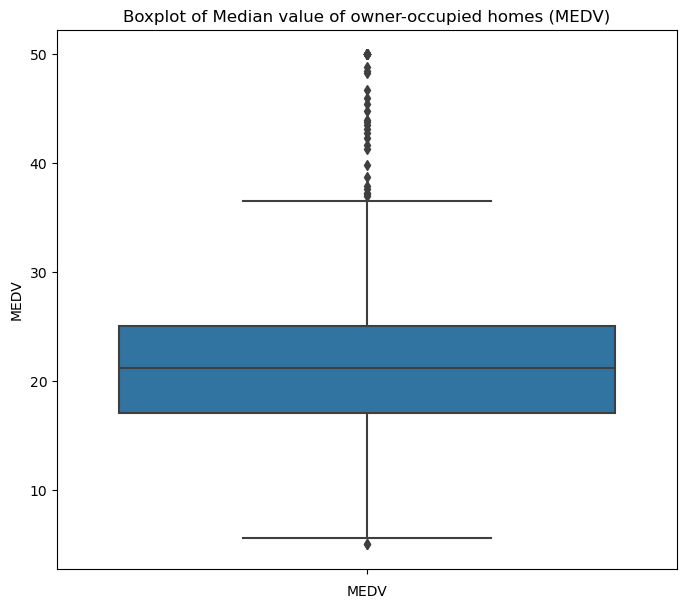

In [10]:
plt.figure(figsize=(8, 7))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes (MEDV)')
plt.xlabel('MEDV')
plt.show()




##  Visualization 4.2: Bar plot for the Charles River variable

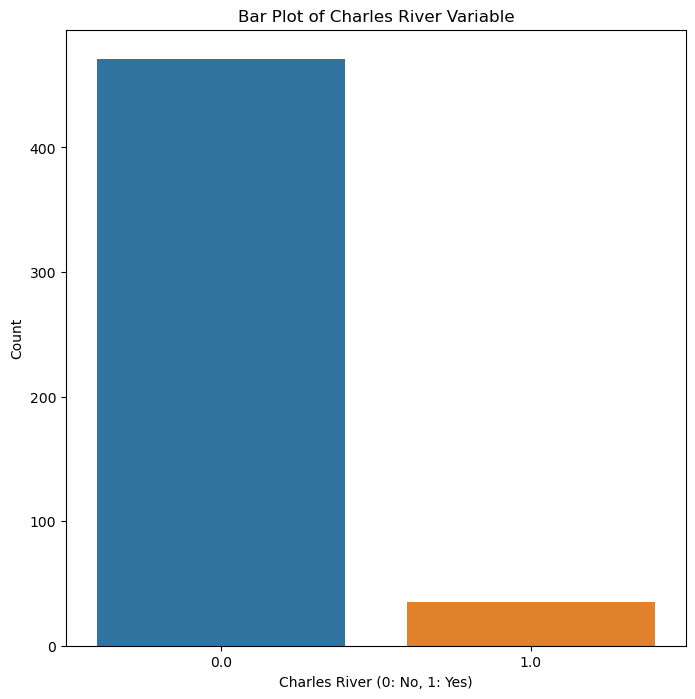

In [11]:
plt.figure(figsize=(8, 8))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


## Visualization 4.3: Boxplot for the MEDV variable vs the AGE variable

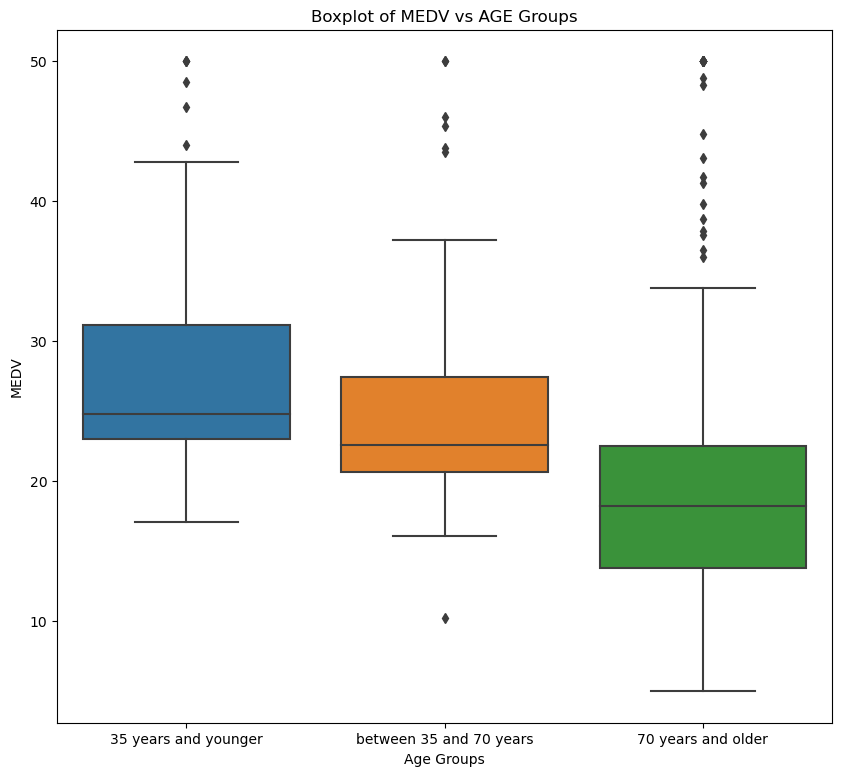

In [13]:
# Discretize the AGE variable into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 9))
sns.boxplot(x=boston_df['AGE_Group'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Groups')
plt.ylabel('MEDV')
plt.show()


## Visualization 4.4: Scatter plot for Nitric oxide concentrations vs Proportion of non-retail business acres per town

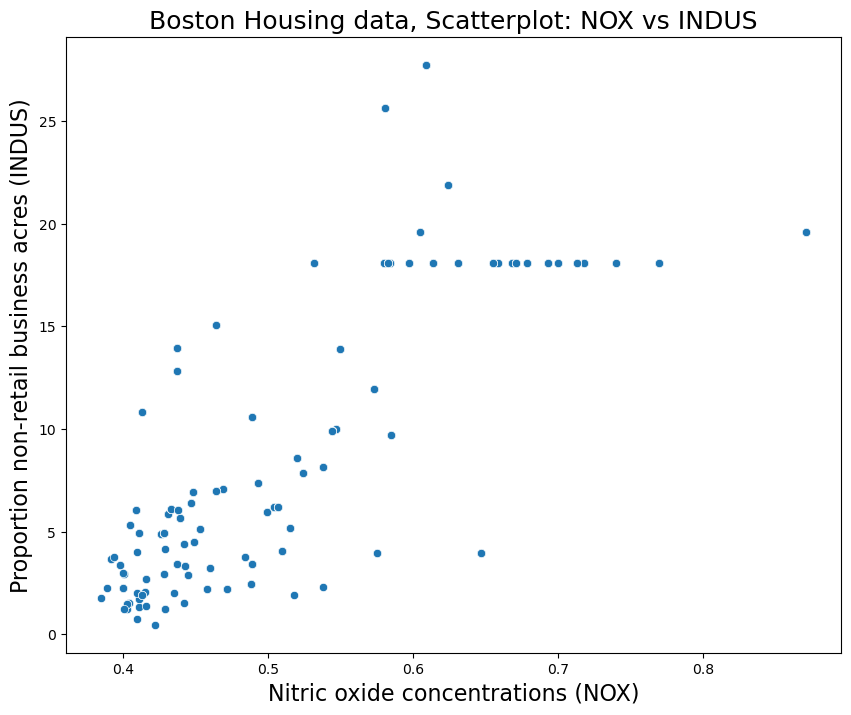

In [19]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Boston Housing data, Scatterplot: NOX vs INDUS', fontsize = 18 )
plt.xlabel('Nitric oxide concentrations (NOX)', fontsize=16)
plt.ylabel('Proportion non-retail business acres (INDUS)', fontsize = 16)
plt.show()


##  Visualization 4.5: Histogram for the pupil to teacher ratio variable (PTRATIO)

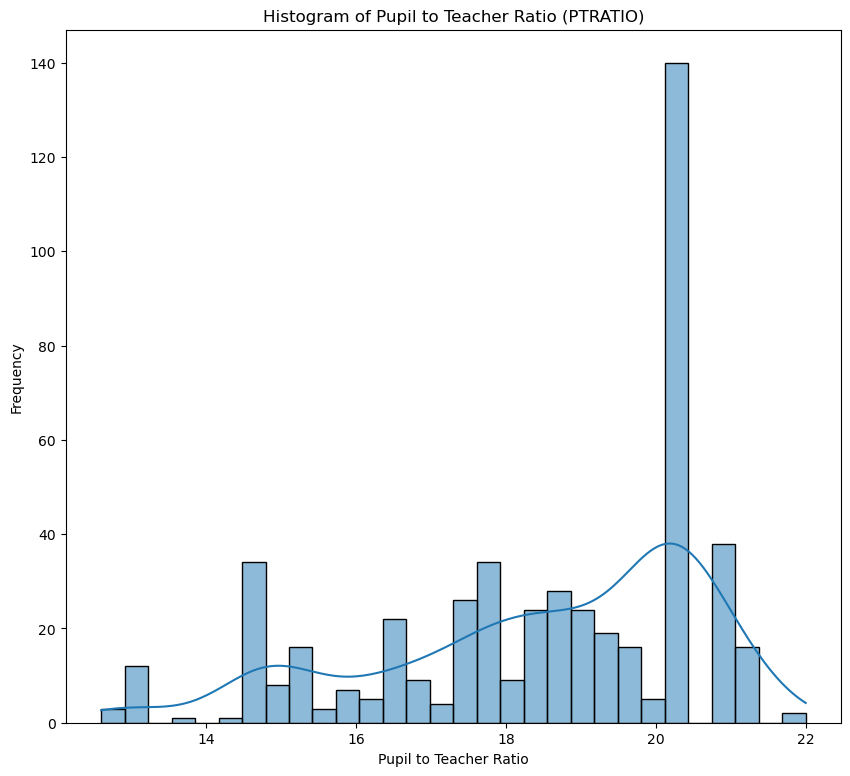

In [22]:

# Visualization 5: Histogram for the pupil to teacher ratio variable (PTRATIO)
plt.figure(figsize=(10, 9))
sns.histplot(boston_df['PTRATIO'], bins=30, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# Task 5: Use the appropriate tests to answer the questions provided.
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

## Q 5.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Hypothesis:**

- Null Hypothesis (H0): There is no significant difference in the median values of houses bounded by the Charles river and those not bounded.
- Alternative Hypothesis (H1): There is a significant difference in the median values.


**Test:**

T-test for independent samples.



In [24]:
from scipy.stats import ttest_ind

charles_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_charles_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(charles_river, not_charles_river)

print(f'T-statistic: {t_stat}\nP-value: {p_value}')

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


**Conclusion**

If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis. The pvalue was >0.05, hence the null hypothesis is valid and we can say "There is no significant difference in the median values of houses bounded by the Charles river and those that not bounded.

## Q 5.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)


**Hypothesis:**

Null Hypothesis (H0): There is no difference in median values of houses for different age groups.

Alternative Hypothesis (H1): There is a significant difference in median values among age groups.

**Test:**

Analysis of Variance (ANOVA).

In [28]:
from scipy.stats import f_oneway

age_groups = [boston_df[boston_df['AGE_Group'] == group]['MEDV'] for group in boston_df['AGE_Group'].unique()]

f_stat, p_value = f_oneway(*age_groups)

print(f'F-statistic: {f_stat}\nP-value: {p_value}')

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


**Conclusion**

The p-value of 1.7 ensures we do not reject the null hypothesis.

## Q5.3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypothesis:**

Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).


Alternative Hypothesis (H1): There is a significant relationship.between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

**Test:**

Pearson Correlation

In [26]:
from scipy.stats import pearsonr

corr_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f'Correlation Coefficient: {corr_coefficient}\nP-value: {p_value}')

Correlation Coefficient: 0.7636514469209162
P-value: 7.913361061229697e-98


**Conclusion**

If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis. The pvalue was >0.05, hence the null hypothesis is valid and we can say "There is no significant relationship  between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

## Q 5.4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression Analysis)

**Hypothesis:**

Null Hypothesis (H0): There is no impact of an additional weighted distance on the median value of owner-occupied homes.

Alternative Hypothesis (H1): There is a significant impact.

**Test:**

Regression Analysis.

In [29]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        14:06:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion**

The DIS co-efficient is p<0.05 meaning we reject the null hypothesis and state there is a significant relationship between Distance to the 5 Boston employment centres and the median value of owner occupied homes